In [ ]:
#BÀI Cifar100

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
from tensorflow.keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow import keras


In [3]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
y_train.shape

(50000, 100)

In [6]:
y_test.shape

(10000, 100)

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(252,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)       

In [15]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.6698 - accuracy: 0.1442 - val_loss: 3.0453 - val_accuracy: 0.2535
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9003 - accuracy: 0.2796 - val_loss: 2.6250 - val_accuracy: 0.3424
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5329 - accuracy: 0.3508 - val_loss: 2.4330 - val_accuracy: 0.3820
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2747 - accuracy: 0.4021 - val_loss: 2.3644 - val_accuracy: 0.3941
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0776 - accuracy: 0.4471 - val_loss: 2.2937 - val_accuracy: 0.4097
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8939 - accuracy: 0.4836 - val_loss: 2.2892 - val_accuracy: 0.4139
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7214 - accuracy: 0.5243 - val_loss: 2.3951 - val_accuracy:

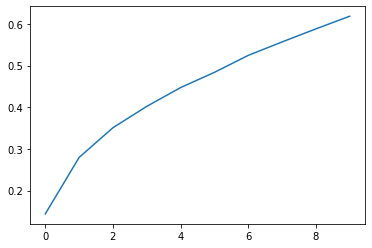

In [16]:
plt.plot(history.history['accuracy'])

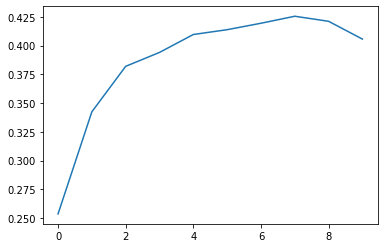

In [17]:
plt.plot(history.history['val_accuracy'])

In [ ]:
model.save('cifar100.h5')